In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from model import LifeTimeModel

plt.style.use('bmh')

%matplotlib inline

# Multinomial Sampling

In [2]:
model = LifeTimeModel('low-assets')

logs/low-assets


In [3]:
model.load()

INFO:tensorflow:Restoring parameters from logs/low-assets


In [4]:
states = []
actions = []
model.env.batch_size = 800
s, term = model.env.reset()
for i in range(model.life_span):
    states.append(s[:, 0])
    a = model.sess.run(model.DQN.predict, {model.DQN.state: s})
    actions.append(model.env.actGrid[a])
    reward, s1, term = model.env.step(a)
    s = s1
states = np.array(states)
actions = np.array(actions)

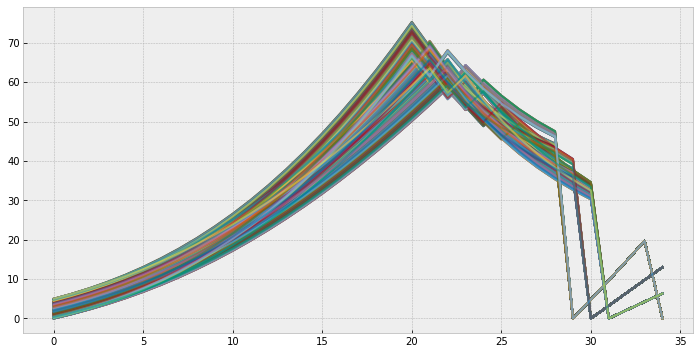

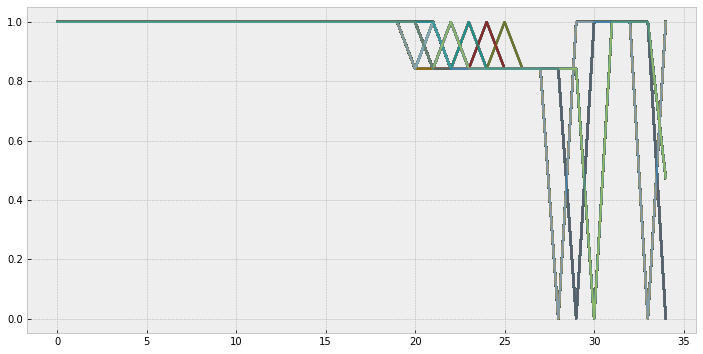

In [5]:
plt.figure(figsize=(12,6))
plt.plot(states, alpha=0.5);
plt.show()
plt.figure(figsize=(12,6))
plt.plot(actions, alpha=0.5);